### Etapa 1
Análise exploratória dos dados
Dataset: Medical Text Dataset - Cancer Doc 
Alunos: Adson Borges, Victor Fidelis

Instalação de algumas bibliotecas utilizadas posteriormentes

In [107]:
#pip install WordCloud
#!pip install seaborn

SyntaxError: invalid syntax (1073290119.py, line 3)

Importação das bibliotecas utilizadas e a referenciação do arquivo do dataset Cancer Doc Classification

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
from tqdm import trange

df=pd.read_csv('CancerDocClassification.csv', encoding='latin1')
df = df.iloc[:,1:3]
df.columns=['labels','text']
df.head()


,labels,text
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


Contagem das classes

In [60]:
df['labels'].value_counts()

labels
Thyroid_Cancer    2810
Colon_Cancer      2580
Lung_Cancer       2180
Name: count, dtype: int64

Codificação das classes

In [61]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['labels'])
df.head()

,labels,text
0,2,Thyroid surgery in children in a single insti...
1,2,""" The adopted strategy was the same as that us..."
2,2,coronary arterybypass grafting thrombosis ï¬b...
3,2,Solitary plasmacytoma SP of the skull is an u...
4,2,This study aimed to investigate serum matrix ...


Contagem das células vazias

In [62]:
df.isnull().sum()

labels    0
text      0
dtype: int64

Contagem da quantidade de linhas que se repetem 

In [63]:
df.duplicated().sum()

6574

Descarte desses textos 

In [64]:
df = df.drop_duplicates(keep='first')
df= df.reset_index(drop=True)
df.duplicated().sum()



0

Verificar o formato do dataset com retirada dos textos duplicados

In [65]:
df.shape

(996, 2)

Recontagem das classes

In [66]:
tmp = df['labels'].value_counts()
tmp

labels
1    452
2    283
0    261
Name: count, dtype: int64

Plotar gráfico de barras referente à quantidade de textos por classes

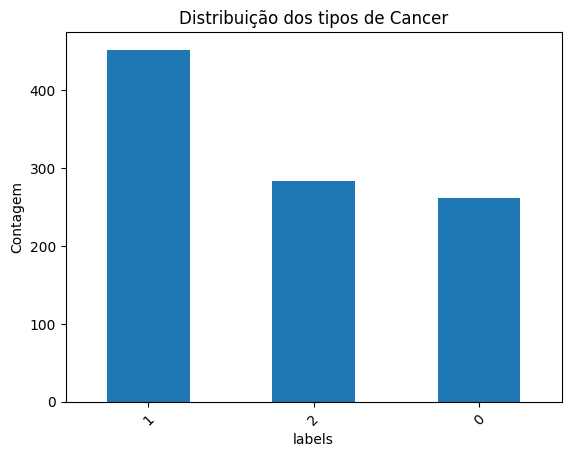

In [67]:
tmp.plot(kind='bar')
plt.ylabel('Contagem')
plt.title('Distribuição dos tipos de Cancer')
plt.xticks(rotation=45)
plt.show()

Transformar todos caracteres em minúsculo e remover sinais de pontuação

In [68]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','', string.punctuation))
    return text

df['text'] = df['text'].apply(clean_text)

print(df)


     labels                                               text
0         2  thyroid surgery in  children in a single insti...
1         2   the adopted strategy was the same as that use...
2         2  coronary arterybypass grafting thrombosis ï¬b...
3         2   solitary plasmacytoma sp of the skull is an u...
4         2   this study aimed to investigate serum matrix ...
..      ...                                                ...
991       1  missense mutation distribution in the exons an...
992       1  versus gemcitabinecarboplatin in advanced nons...
993       2   keloids are pathological scars that grow over...
994       0  the anization of cells into multiple membranou...
995       0  several immunotherapeutic strategies that harn...

[996 rows x 2 columns]


instalação algumas bibliotecas e recursos que serão utilizados

In [69]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

Tokenização, removeção de stopwords e lemmatização dos textos 

In [70]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stop_words.add("\x93")
stop_words.add("et")
stop_words.add("al")
stop_words.add("a0al")

lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    words = word_tokenize(text)  # Tokenizar o texto
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remover stopwords
    lemmatized_words = [lemmatizer.lemmatize(words) for words in filtered_words]  # Lemmatizar
    return lemmatized_words

# Aplicar a função ao DataFrame
df['tokens'] = df['text'].apply(preprocess_text)

print(df)

     labels                                               text  \
0         2  thyroid surgery in  children in a single insti...   
1         2   the adopted strategy was the same as that use...   
2         2  coronary arterybypass grafting thrombosis ï¬b...   
3         2   solitary plasmacytoma sp of the skull is an u...   
4         2   this study aimed to investigate serum matrix ...   
..      ...                                                ...   
991       1  missense mutation distribution in the exons an...   
992       1  versus gemcitabinecarboplatin in advanced nons...   
993       2   keloids are pathological scars that grow over...   
994       0  the anization of cells into multiple membranou...   
995       0  several immunotherapeutic strategies that harn...   

                                                tokens  
0    [thyroid, surgery, child, single, institution,...  
1    [adopted, strategy, used, prior, year, based, ...  
2    [coronary, arterybypass, grafti

Contagem de palavras, bigramas e trigramas

In [72]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('cell', 25347),
 ('cancer', 19807),
 ('patient', 16727),
 ('study', 12300),
 ('expression', 9739),
 ('tumor', 8822),
 ('gene', 8153),
 ('lung', 7850),
 ('analysis', 6765),
 ('data', 6720)]

In [73]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

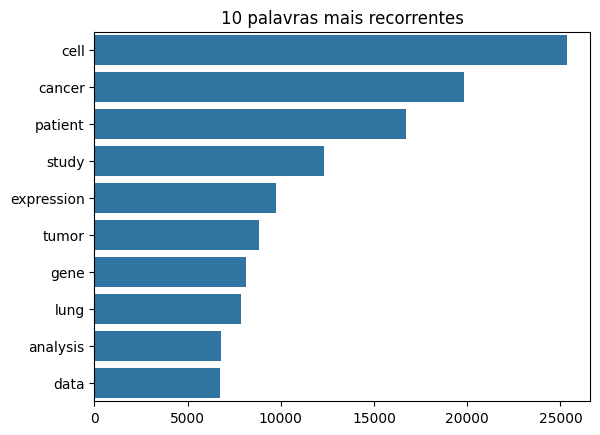

In [74]:
sns.barplot(x=freq, y=words)
plt.title('10 palavras mais recorrentes')
plt.show()

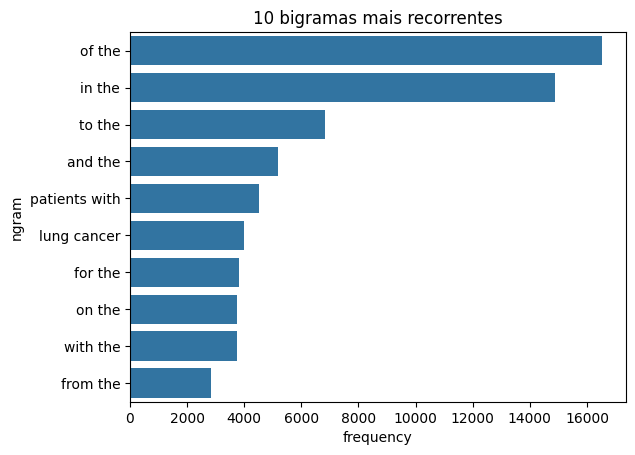

In [80]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams=cv.fit_transform(df['text'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('10 bigramas mais recorrentes')
plt.show()


In [81]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('10 trigramas mais recorrentes')
plt.show()

MemoryError: Unable to allocate 12.7 GiB for an array with shape (996, 1711090) and data type int64

### Naive Bayes

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Dividir o dataset em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['labels'], test_size=0.2, random_state=42)

# Converter os textos em vetores TF-IDF
vectorizer = TfidfVectorizer(stop_words= list(stop_words), max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [94]:
from sklearn.naive_bayes import MultinomialNB

# Treinar o modelo Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb_classifier.predict(X_test_tfidf)

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

# Precisão média ponderada (considera o desbalanceamento de classes)
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precisão (Weighted): {precision * 100:.2f}%')

# Recall médio ponderado
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall (Weighted): {recall * 100:.2f}%')

# F1-score médio ponderado
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1-Score (Weighted): {f1 * 100:.2f}%')

# Relatório de Classificação Completo
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 47.50%
Precisão (Weighted): 45.79%
Recall (Weighted): 47.50%
F1-Score (Weighted): 33.85%

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.33      0.02      0.03        55
           1       0.47      1.00      0.64        89
           2       0.56      0.09      0.15        56

    accuracy                           0.47       200
   macro avg       0.45      0.37      0.28       200
weighted avg       0.46      0.47      0.34       200



### Bi-LSTM

In [98]:
#pip install tensorflow

  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [114]:
import tensorflow as tf
import ast
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Defina o tamanho máximo de tokens em uma sequência
max_len = 5  # exemplo, ajustar conforme necessário

# Converte as strings de tokens para listas de inteiros
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x))

# Padronize as sequências para o mesmo comprimento
X = pad_sequences(df['tokens'].values, maxlen=max_len, padding='post')

# Convertendo os labels para numpy array
y = df['label'].values

# Divida os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo parâmetros do modelo
vocab_size = len(tokenizer.word_index) + 1  # tamanho do vocabulário (ajustar conforme necessário)
embedding_dim = 128  # dimensão do embedding
lstm_units = 64  # número de unidades LSTM

# Construindo o modelo
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=False)))
model.add(Dropout(0.5))  # regularização
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # para classificação binária; use softmax para múltiplas classes

# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Visualizando a arquitetura do modelo
model.summary()

# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


SyntaxError: invalid decimal literal (<unknown>, line 1)